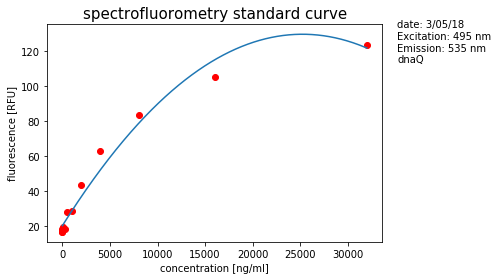

blank standard deviation: 0.33840295506984
blank average: 14.510200000000001
detection limit: 15.52540886520952


(0.33840295506984, 14.510200000000001, 15.52540886520952)

In [19]:
%run ../../functions.ipynb
#dna


concentration_dna_q_in_ngul = [32, 16, 8, 4, 2, 1, 0.5, 0.25, 0.125, 0.0625, 0.0625/2, 0.0625/4, 0.0625/8, 0.0625/16, 0.00]
concentration_dna_q_in_ngml = multiply_by_1000(concentration_dna_q_in_ngul)

def multiply_by_1000(array):
    result = []
    for i in array:
        result.append(i*1000)
    return result


concentration_dna_q_in_ngml = multiply_by_1000(concentration_dna_q_in_ngul)

concentration_dna_q_in_ngul = [32, 16, 8, 4, 2, 1, 0.5, 0.25, 0.125, 0.0625, 0.0625/2, 0.0625/4, 0.0625/8, 0.0625/16]

fluorometry_measurement_standard = {"date" : "3/05/18",
"standard name" : "Lambda DNA",
"concentration": [32000, 16000, 8000, 4000,
                  2000, 1000, 500, 250,
                  25, 2.5, 0.25, 0.025,
                  0.00],                                  
"fluorescence [RFU]" : [123.86, 105.24, 83.604, 62.811,
                       43.786, 28.986, 28.098, 18.266,
                       19.419, 17.262, 17.039, 18.528,
                       16.818],
"concentration units" : "[ng/ml]",
"Excitation" : "495 nm", 
"Emission"  : "535 nm",
"fluorochrome" : "dnaQ",
"blank" : [14.725, 14.165, 14.220, 14.378, 15.063]                                    
}

blank = [14.725, 14.165, 14.220, 14.378, 15.063]

plot_with_more_data(fluorometry_measurement_standard["concentration"],
                   fluorometry_measurement_standard["fluorescence [RFU]"],
                   fluorometry_measurement_standard["date"],
                   fluorometry_measurement_standard["Excitation"],
                   fluorometry_measurement_standard["Emission"],
                   fluorometry_measurement_standard["fluorochrome"])


lod(fluorometry_measurement_standard["blank"])


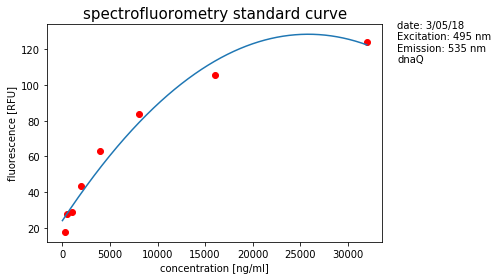

In [20]:
fluorometry_measurement_standard_deleted_points = {"date" : "3/05/18",
"standard name" : "Lambda DNA",
"concentration": [32000, 16000, 8000, 4000,
                  2000, 1000, 500, 250],                                  
"fluorescence [RFU]" : [123.86, 105.24, 83.604, 62.811,
                       43.786, 28.986, 28.098, 17.88866666666667],
"concentration units" : "[ng/ml]",
"Excitation" : "495 nm", 
"Emission"  : "535 nm",
"fluorochrome" : "dnaQ",
"blank" : [14.725, 14.165, 14.220, 14.378, 15.063]                                    
}

plot_with_more_data(fluorometry_measurement_standard_deleted_points["concentration"],
                   fluorometry_measurement_standard_deleted_points["fluorescence [RFU]"],
                   fluorometry_measurement_standard_deleted_points["date"],
                   fluorometry_measurement_standard_deleted_points["Excitation"],
                   fluorometry_measurement_standard_deleted_points["Emission"],
                   fluorometry_measurement_standard_deleted_points["fluorochrome"])



In [21]:
average([18.266,19.419, 17.262, 17.039, 18.528,16.818])

17.88866666666667

In [27]:
#specifity assay
import numpy as np

name = "DNAQ"
control = [{"name": "dsDNA",
        "fluorescences": [48.161, 53.214, 51.891]}]
        
data = [{"name": "dsDNA + RNA",
        "fluorescences": [55.140, 56.493, 53.983]},
        {"name": "dsDNA + ssDNA",
        "fluorescences": [48.784, 43.190, 45.970]},
        {"name": "dsDNA + protein",
        "fluorescences": [42.664, 36.653, 33.200]}]

specificity_assay(control, data, name)
results= specificity_assay(control, data, name)
results

,average,cv,fluorescences,name,standard_deviation,unspecificity,specificity,fluorochrome
0,55.205333,0.018581,"[55.14, 56.493, 53.983]",dsDNA + RNA,1.025744,8.057886,91.942114,DNAQ
1,45.981333,0.049667,"[48.784, 43.19, 45.97]",dsDNA + ssDNA,2.283755,9.996999,90.003001,DNAQ
2,37.505667,0.104262,"[42.664, 36.653, 33.2]",dsDNA + protein,3.910422,26.587110,73.412890,DNAQ


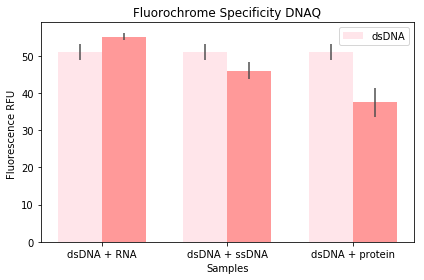

In [28]:
double_bar_graph((np.repeat(control[0]["average"], 3)),
                 results["average"],
                 results["name"],
                 sd_1=(np.repeat(control[0]["standard_deviation"], 3)),
                 sd_2=results["standard_deviation"].values,
                 xlabel="Samples", ylabel="Fluorescence RFU ", title=("Fluorochrome Specificity "+ str(name)),
                legend_1="dsDNA", legend_2="", colour1="pink" )

In [24]:
control

[{'average': 51.08866666666666,
  'cv': 0.04187761133288799,
  'fluorescences': [48.161, 53.214, 51.891],
  'name': 'dsDNA',
  'standard_deviation': 2.1394713261821368}]

In [25]:
# np.array(dnaq_raw[0]["fluorescences"])*2
#unspecifities = []
#for avg in results["average"]:
#    unspecifities.append(unspecifity_of_fluorochrome(control["average"], avg))    
#unspecifities = [unspecifity_of_fluorochrome(control["average"], avg) for avg in results["average"]]
#results.T.to_dict().values()
#results.append(results, ignore_index=True)

In [26]:
#np.repeat(control[0]["average"], 3)

array([51.08866667, 51.08866667, 51.08866667])

In [38]:
dnaq_specificity = np.array(results["specificity"])
dnaq_specificity_average = average(np.array(results["specificity"]))

In [39]:
dnaq_specificity_average = average(np.array(results["specificity"]))
dnaq_specificity_average

85.1193350123315

In [40]:
dnaq_specificity = [91.94211371, 90.00300132, 73.41289001]
dnaq_specificity_average = 85.1193350123315

array([91.94211371, 90.00300132, 73.41289001])